In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [129]:
df = pd.read_csv("EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [130]:
df.shape

(3999, 12)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [133]:
df = df.drop("ID#", axis=1)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [134]:
df.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


#Data Preprocessing

In [135]:
from scipy import stats
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [136]:
df_sample = df.sample(frac=0.2, random_state=42)

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sample)

In [138]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.848001,-0.125829,-0.740830,0.0,0.0,-0.781583,-1.258070,-0.384350,-0.407033,0.931598,1.409842
1,-0.848559,-0.125829,-0.740830,0.0,0.0,-0.553876,0.544612,-0.147160,0.136177,-1.823494,-0.709299
2,1.444203,-0.125829,2.413672,0.0,0.0,3.811511,2.106936,-0.305286,0.136177,1.185535,1.409842
3,-0.511039,-0.125829,0.836421,0.0,0.0,0.254491,0.905148,-0.384350,-0.407033,1.600056,1.409842
4,-0.430952,-0.125829,-0.740830,0.0,0.0,-0.723477,-0.777355,0.406283,0.679387,-1.170998,-0.709299
...,...,...,...,...,...,...,...,...,...,...,...
721,-0.839544,-0.125829,-0.740830,0.0,0.0,-0.781583,-1.258070,-0.384350,-0.407033,0.133028,-0.709299
722,-0.243056,-0.125829,-0.740830,0.0,0.0,-0.626767,-0.897534,0.801599,0.136177,-0.653934,-0.709299
723,1.312086,-0.125829,0.836421,0.0,0.0,0.589666,1.385863,1.065670,0.679387,-0.929637,-0.709299
724,-0.821480,-0.125829,0.047795,0.0,0.0,-0.257304,0.063897,-0.384350,-0.407033,-1.001706,1.409842


#Implementing clustering algorithms

In [139]:
from sklearn.cluster import KMeans

In [140]:
wcss = []
for i in range(1,30):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

In [141]:
wcss

[6534.000000000004,
 4876.681821966264,
 4050.013727069248,
 3991.2698568989513,
 3247.454866765192,
 2676.060760544071,
 2522.9849326893163,
 2268.7153717929027,
 2158.0727761823987,
 2042.6861375810286,
 1958.0115020172389,
 1887.2733828100286,
 1772.5099438221014,
 1735.0708598428553,
 1682.4321464420875,
 1641.793306502585,
 1611.6415136424969,
 1555.175038122263,
 1497.746043787724,
 1442.5222154799778,
 1428.887238039462,
 1386.9280899335417,
 1313.9342820813263,
 1285.0931142619183,
 1229.0033461036253,
 1207.0524628776866,
 1192.2993128753926,
 1165.5515206396042,
 1124.6860598458782]

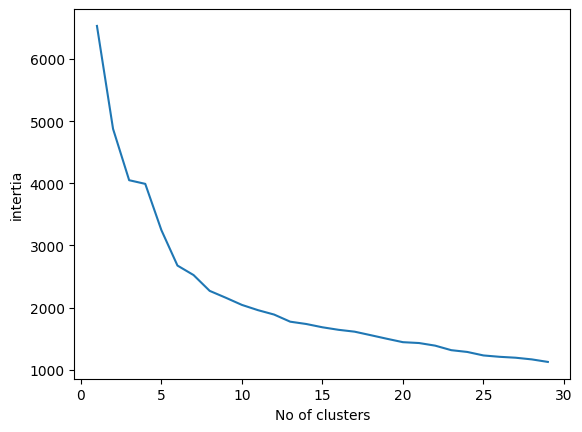

In [142]:
plt.plot(range(1,30), wcss)
plt.xlabel("No of clusters")
plt.ylabel("intertia")
plt.show()

In [143]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)
kmeans_labels = kmeans.labels_

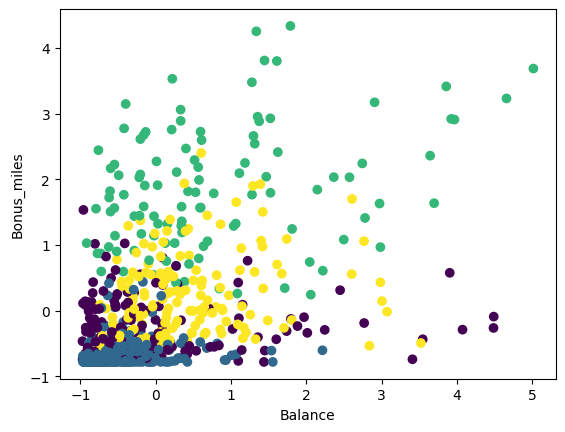

In [144]:
plt.scatter(df_scaled["Balance"], df_scaled["Bonus_miles"], c=kmeans_labels)
plt.xlabel("Balance")
plt.ylabel("Bonus_miles")
plt.show()

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

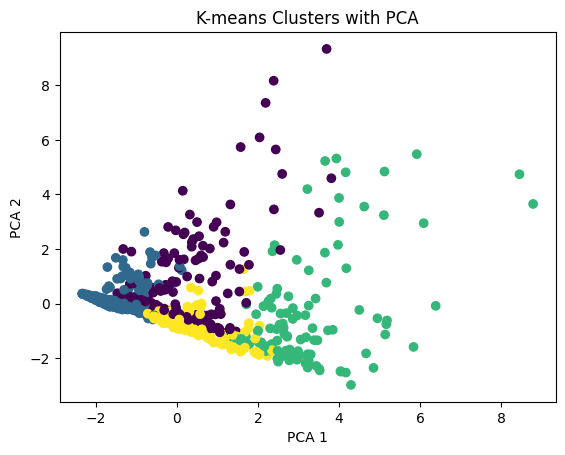

In [148]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Clusters with PCA')
plt.show()

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [111]:
linked = linkage(df_scaled, method="ward")

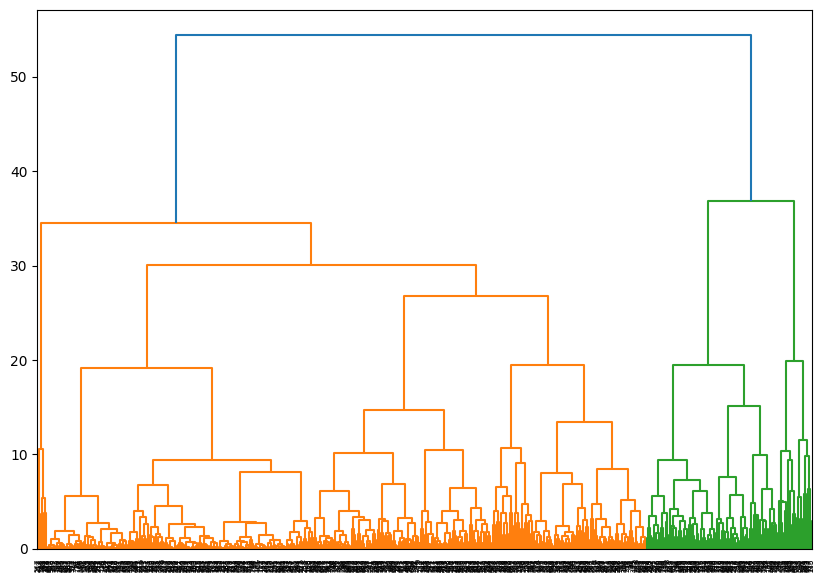

In [112]:
label_list = range(1, df_scaled.shape[0]+1)
plt.figure(figsize=(10,7))
dendrogram(linked, orientation="top", labels=label_list, distance_sort="desecnding")
plt.show()

In [113]:
from sklearn.cluster import AgglomerativeClustering

In [115]:
hc = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
hc_labels = hc.fit_predict(df_scaled)

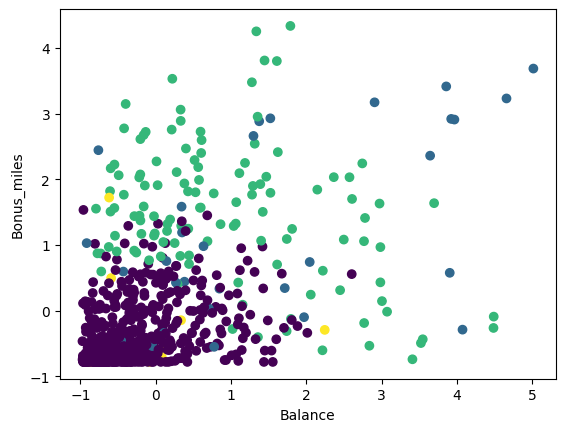

In [116]:
plt.scatter(df_scaled["Balance"], df_scaled["Bonus_miles"], c=hc_labels)
plt.xlabel("Balance")
plt.ylabel("Bonus_miles")
plt.show()

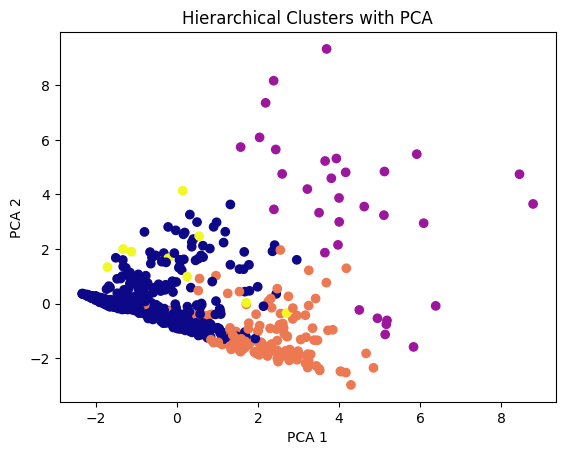

In [149]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hc_labels, cmap='plasma', marker='o')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hierarchical Clusters with PCA')
plt.show()

In [117]:
from sklearn.neighbors import NearestNeighbors

In [118]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

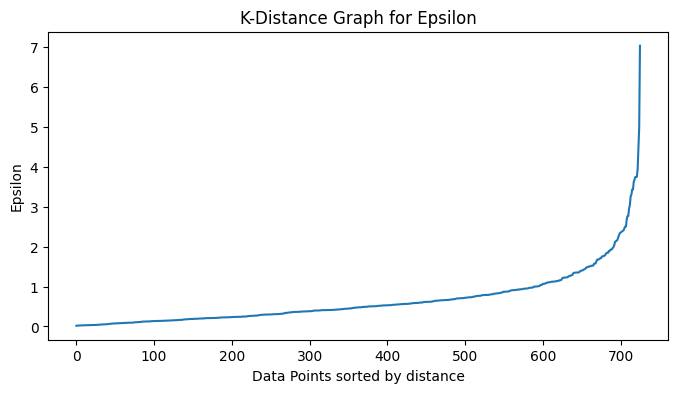

In [119]:
distances = np.sort(distances[:, 1])
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('K-Distance Graph for Epsilon')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [120]:
from sklearn.cluster import DBSCAN

In [121]:
epsilon = 0.5
min_samples = 5

In [122]:
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(df_scaled)

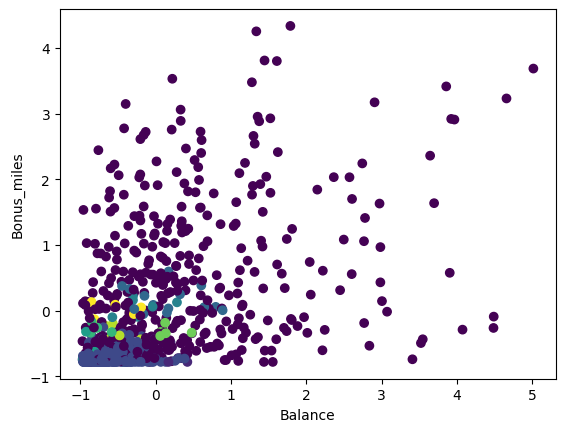

In [123]:
plt.scatter(df_scaled["Balance"], df_scaled["Bonus_miles"], c=dbscan_labels)
plt.xlabel("Balance")
plt.ylabel("Bonus_miles")
plt.show()

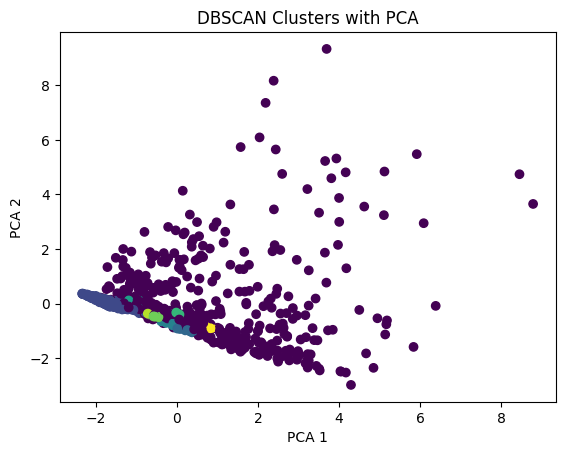

In [151]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, marker='o')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clusters with PCA')
plt.show()

#Evaluation and Performance metrics

In [152]:
from sklearn.metrics import silhouette_score

In [153]:
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print(kmeans_silhouette)

0.22837386446250363


In [154]:
hc_silhouette = silhouette_score(df_scaled, hc_labels)
print(hc_silhouette)

0.3449973324234459


In [155]:
dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
print(dbscan_silhouette)

-0.25944922299151135
